Fish market dataset was created by SAS Ondemand for Academics,
record 7 different fish species in fish market sales, and contains 7 features.

each features are about...

1. Species: Name of the species
2. Weight: Weight of the individual fish in grams
3. Length1: Vertical length in cm
4. Length2: Diagnoal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Width in cm

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\pcharm projects\Downloads\Fish.csv")

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df = df[["Species","Length1","Length2","Length3","Height","Width","Weight"]]

In [6]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


### checking for Null Values

In [7]:
df.isnull().sum()

Species    0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Weight     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Weight   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Checking for outliers

In [30]:
list_features = list(df.columns)
cat_target_list = ['Species','Weight']
for i in cat_target_list:
    list_features.remove(i)
list_features

['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [11]:
# function to detect outliers in the numerical columns.
def check_outliers(column,df):
    outliers = []
    threshold = 3
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    for i in df[column]:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    return outliers 

In [31]:
for i in list_features:
    print(f"Outliers in {i} are {check_outliers(i,df)}")

Outliers in Length1 are [59.0]
Outliers in Length2 are [63.4]
Outliers in Length3 are [68.0]
Outliers in Height are []
Outliers in Width are []


### Data Visualization

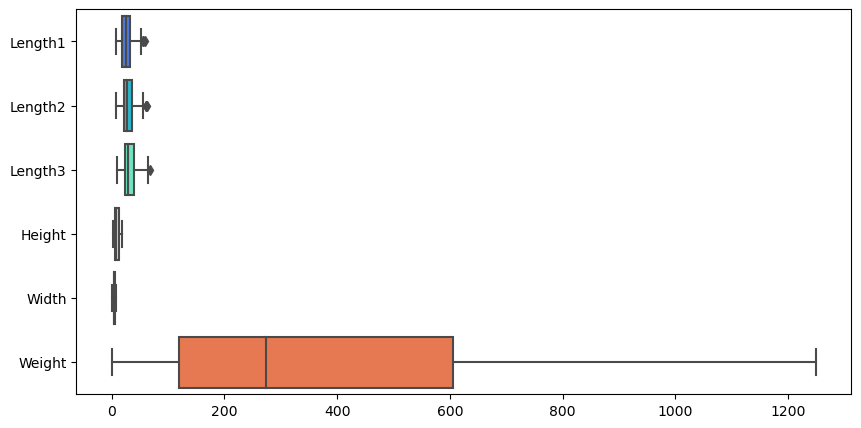

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,orient='h',palette="rainbow")
plt.show()

### Checking distrribution for Species 

In [9]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

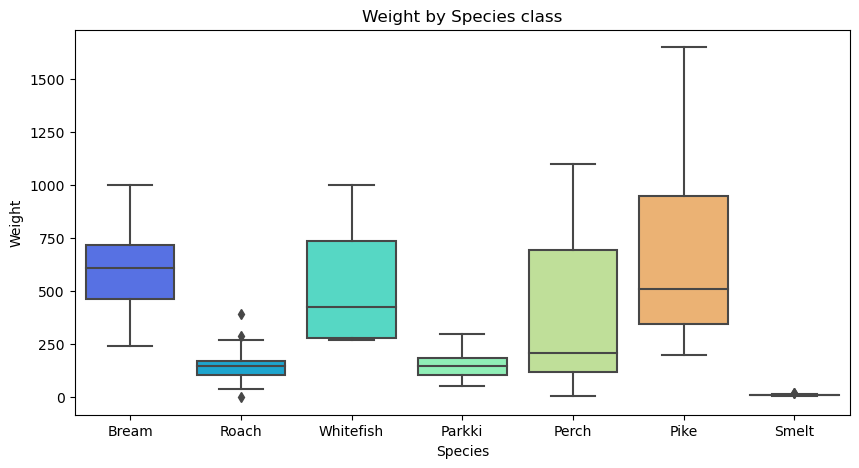

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Species",y="Weight",data=df,palette="rainbow")
plt.title("Weight by Species class")
plt.show()

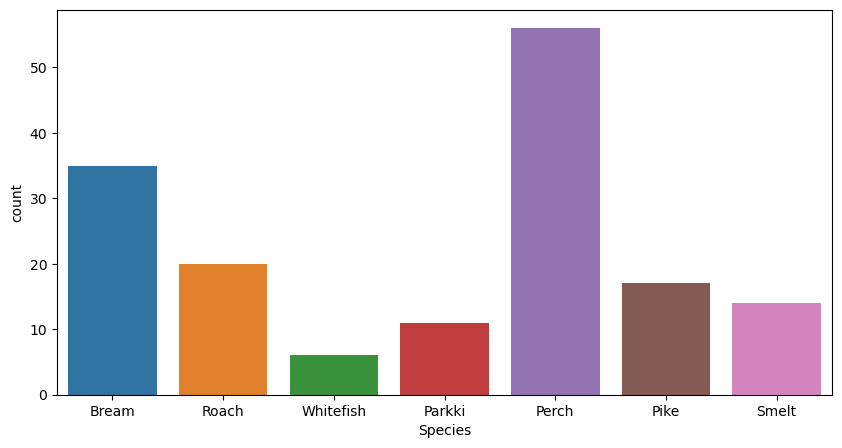

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Species"],data=df)
plt.show()

<Figure size 1000x500 with 0 Axes>

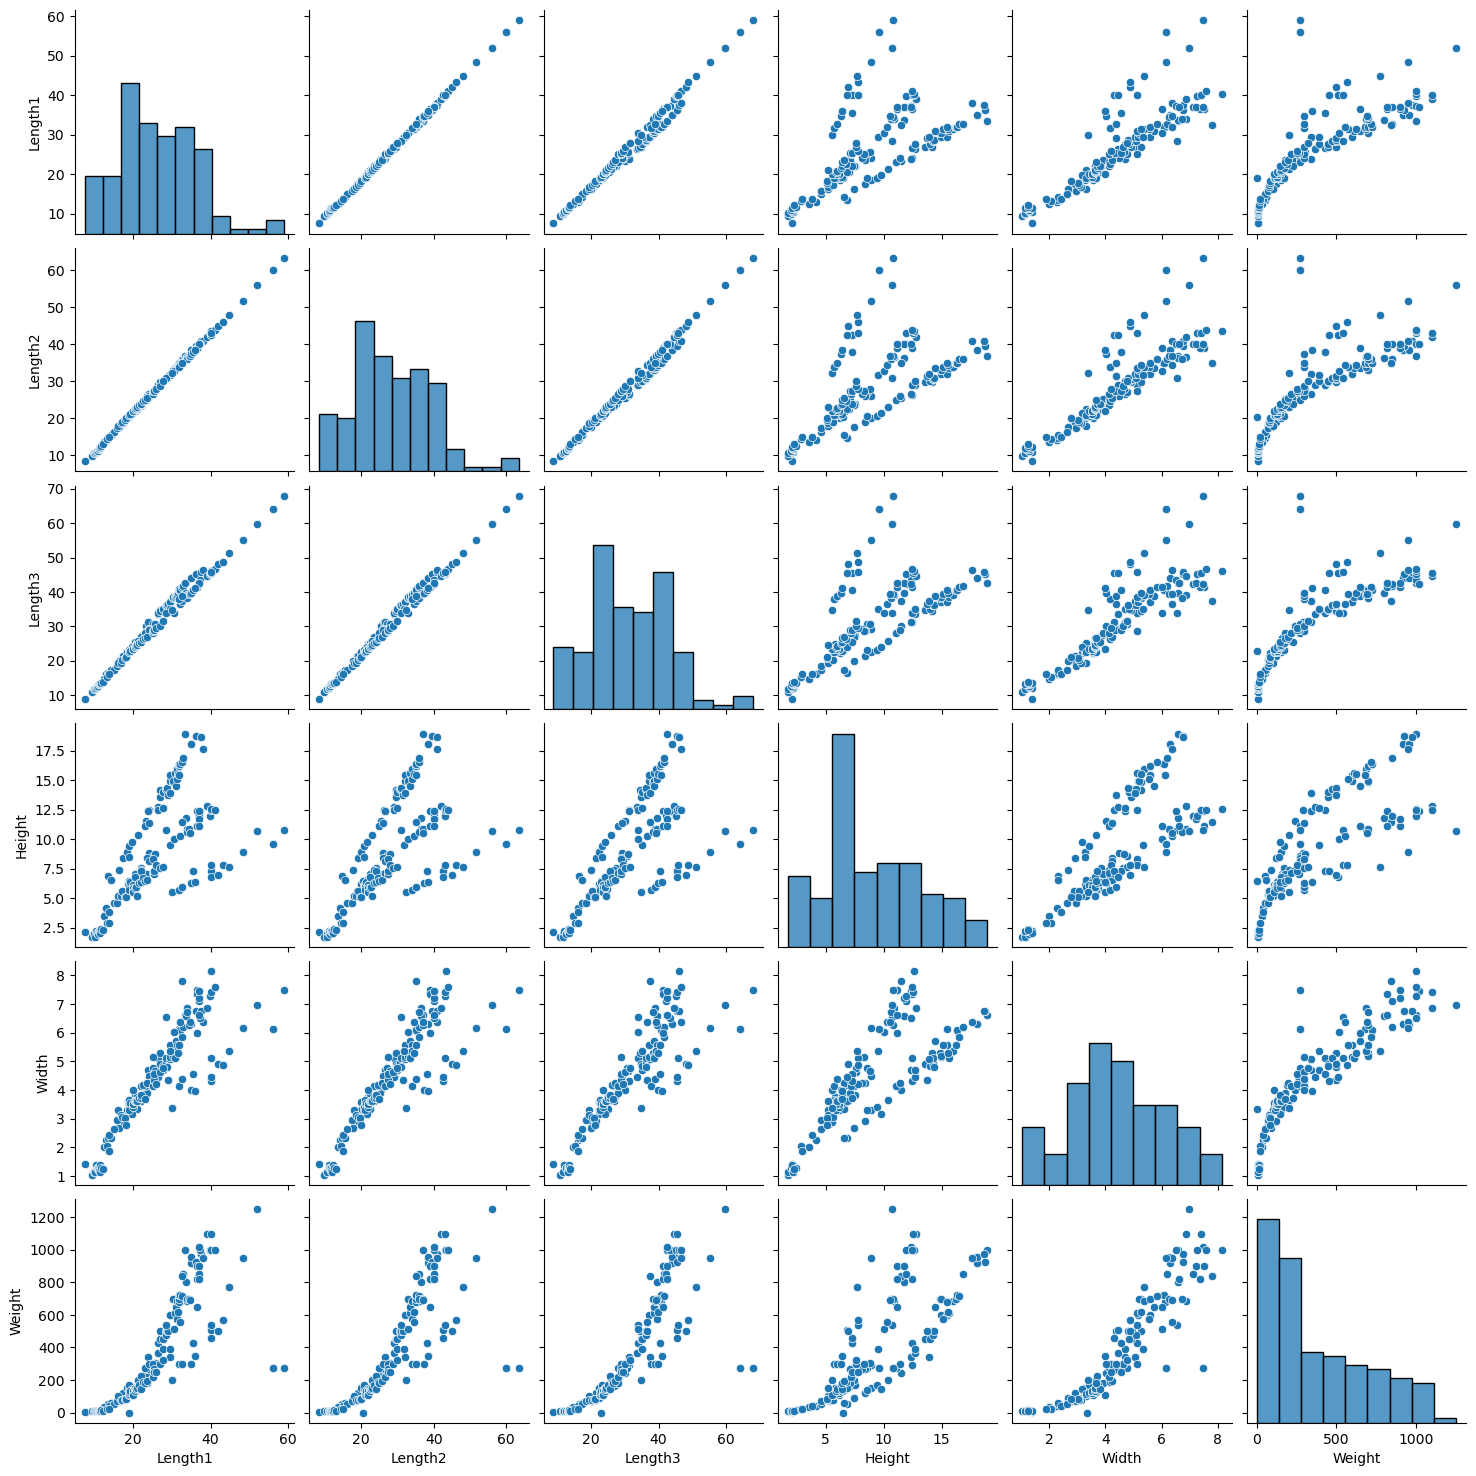

In [43]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

<AxesSubplot:>

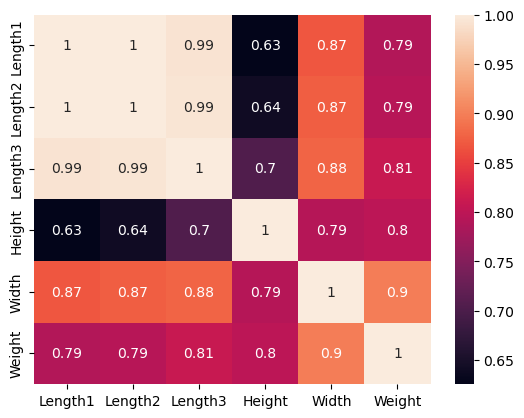

In [46]:
sns.heatmap(df.corr(), annot=True)

### Encoding Species column

In [71]:
df1 = pd.get_dummies(df.Species,drop_first=True)
df1.head()

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [72]:
df2 = pd.concat([df,df1],axis=1)
df2.head()

,Species,Length1,Length2,Length3,Height,Width,Weight,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0,0,0,0,0,0,0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0,0,0,0,0,0,0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0,0,0,0,0,0,0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0,0,0,0,0,0,0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0,0,0,0,0,0,0


In [73]:
df2.drop("Species",axis=1,inplace=True)

### Feature Scaling

#### Standardization

In [78]:
col_list = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']
col_list

['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']

In [79]:
df_std = (df2[col_list]-df2[col_list].mean())/df2[col_list].std()
df_std.head()

,Length1,Length2,Length3,Height,Width,Weight
0,-0.304825,-0.281414,-0.105686,0.594700,-0.235784,-0.414413
1,-0.224797,-0.197430,-0.002329,0.818674,-0.066369,-0.262901
2,-0.234801,-0.178767,-0.010942,0.794830,0.165271,-0.105076
3,0.005285,0.054522,0.195772,0.877001,0.022550,-0.032476
4,0.025292,0.054522,0.238837,0.810275,0.425028,0.179010


### Min_Max_Scalling

In [80]:
df_std[col_list] = (df_std[col_list]-df_std[col_list].min())/(df_std[col_list].max()-df_std[col_list].min())
df_std.head()

,Length1,Length2,Length3,Height,Width,Weight
0,0.304854,0.309091,0.358108,0.568334,0.418978,0.1936
1,0.320388,0.325455,0.378378,0.624055,0.459235,0.2320
2,0.318447,0.329091,0.376689,0.618123,0.514279,0.2720
3,0.365049,0.374545,0.417230,0.638566,0.480365,0.2904
4,0.368932,0.374545,0.425676,0.621966,0.576004,0.3440


In [86]:
df_final = pd.concat([df1,df_std],axis=1)
df_final = df_final[["Length1","Length2","Length3","Height","Width",
                     "Weight","Parkki","Perch","Pike","Roach","Smelt","Whitefish"]]
df_final.head()

,Length1,Length2,Length3,Height,Width,Weight,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.304854,0.309091,0.358108,0.568334,0.418978,0.1936,0,0,0,0,0,0
1,0.320388,0.325455,0.378378,0.624055,0.459235,0.2320,0,0,0,0,0,0
2,0.318447,0.329091,0.376689,0.618123,0.514279,0.2720,0,0,0,0,0,0
3,0.365049,0.374545,0.417230,0.638566,0.480365,0.2904,0,0,0,0,0,0
4,0.368932,0.374545,0.425676,0.621966,0.576004,0.3440,0,0,0,0,0,0


In [91]:
df_final.shape

(159, 12)

In [106]:
df_backup = df_final.copy()

In [89]:
X = df_final.drop("Weight",axis=1)
X.head()

,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.304854,0.309091,0.358108,0.568334,0.418978,0,0,0,0,0,0
1,0.320388,0.325455,0.378378,0.624055,0.459235,0,0,0,0,0,0
2,0.318447,0.329091,0.376689,0.618123,0.514279,0,0,0,0,0,0
3,0.365049,0.374545,0.417230,0.638566,0.480365,0,0,0,0,0,0
4,0.368932,0.374545,0.425676,0.621966,0.576004,0,0,0,0,0,0


In [90]:
y = df_final["Weight"]
y.head()

0    0.1936
1    0.2320
2    0.2720
3    0.2904
4    0.3440
Name: Weight, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Building

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

In [96]:
model.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [101]:
model.score(X_test,y_test)

0.8771175177344109

In [102]:
model.coef_

array([ 4.44953113, -1.28828235, -4.10706539,  1.38362125,  0.61144685,
       -0.05054287,  0.12663098,  0.46158775,  0.12196238,  0.30321996,
        0.10228933])

In [103]:
model.intercept_

-0.31230427147554085

In [104]:
from sklearn.metrics import r2_score

In [105]:
r2_score(y_pred,y_test)

0.8198184444550597